In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad
from scipy.special import j0 # Bessel function of the 1st kind, 0th order

In [2]:
%run ./special_functions.ipynb

In [20]:
# quadrature
def omega(la, eps, nu):
    return np.sqrt(1 + eps*la**4 - nu**2)

def integrand_acc(la, r, t, a, eps, nu):
    return np.exp(-a**2*la**2/4) * la * np.sin(omega(la, eps, nu)*t) * omega(la, eps, nu) * j0(r*la)

def acc_w(r, t, params):
    a, j, eps, nu = params
    val, _ = quad(integrand_acc, 0, 400, args=(r, t, a, eps, nu),
                  limit=500, epsabs=1e-4)
    return (j/(2*np.pi)) * val

# stat phase
def w_sf(r, t, params):
    a, j, eps, _ = params
    return -j/(4*np.pi*t**2*eps)*np.exp(-a**2 * r**2 / (16 * t**2 * eps)) * r**2/(4*t) * np.cos(r**2/(4*t*np.sqrt(eps)))

In [21]:
a = 1
j = 1
eps = 100 # eps = h^2/(12*R^2) -- small parameter??
nu = 0.3 # Poisson's constant
params = (a, j, eps, nu)

r_sections = [50, 200, 400]
t = np.linspace(0.1, 10, 1000)
w_solution = solve(acc_w, r_sections, t, params)

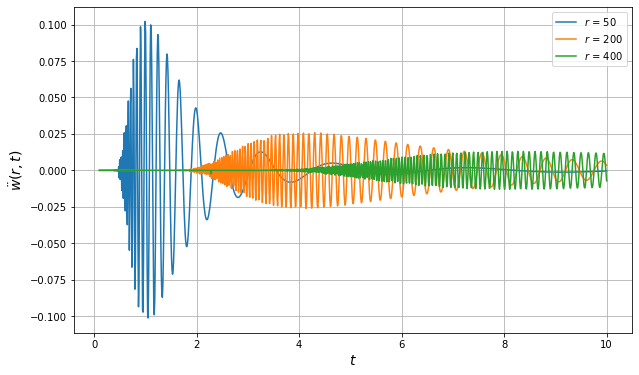

In [22]:
name = 'sphere_acceleration_r=[50,200,400]_eps=100'
plot_results(t, w_solution, r_sections, figname=None, 
             lgd=r'$r$', xl=r'$t$', yl=r'$\ddot{w}(r,t)$', title=None, fontsize=14)

## Stationary phase solution

In [15]:
a = 1
j = 1
eps = 10 # eps = h^2/(12*R^2)
nu = 0.3 # Poisson's constant
params_sf = (a, j, eps, nu)

r_sections = [50, 200, 400]
t = np.linspace(0.1, 10, 2000)
w_solution_sf = solve(w_sf, r_sections, t, params_sf)

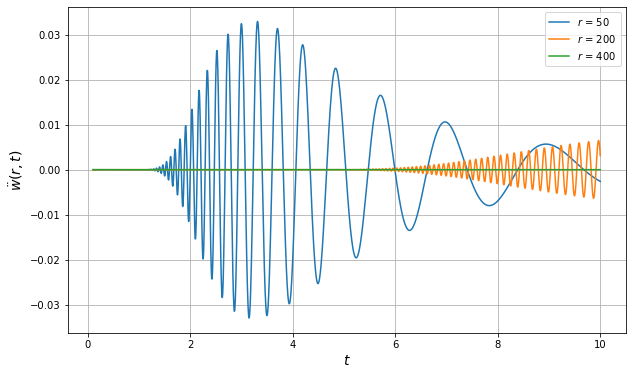

In [16]:
name = f'sphere_acceleration_r=[50,200,400]_sf_eps={eps}'
plot_results(t, w_solution_sf, r_sections, figname=None,
            lgd=r'$r$', xl=r'$t$', yl=r'$\ddot{w}(r,t)$', fontsize=14, title=None)